In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

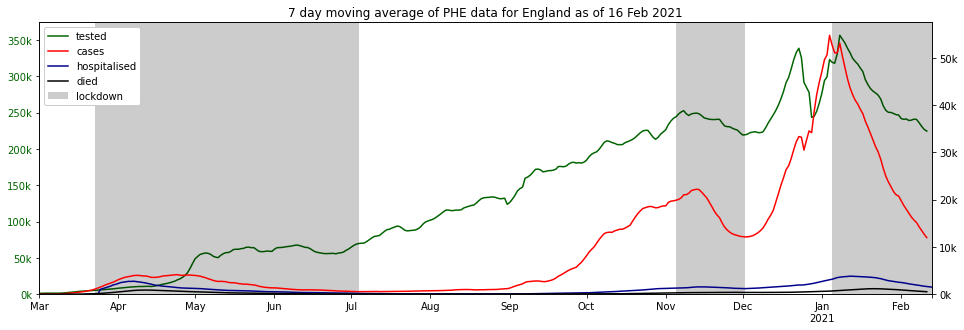

In [3]:
plot_summary(earliest_date='2020-03-01')

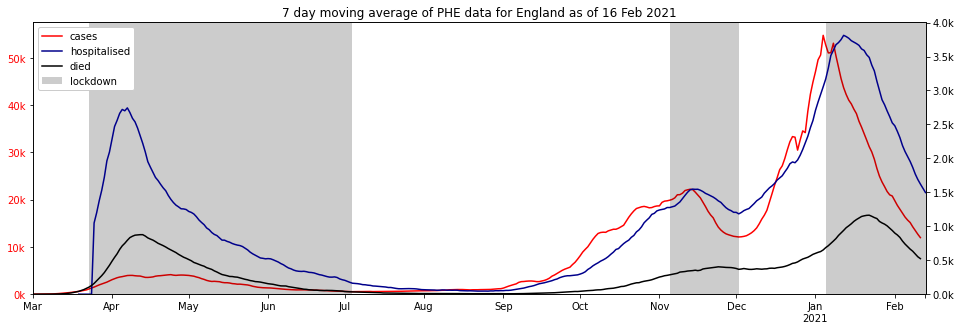

In [4]:
plot_summary(earliest_date='2020-03-01', left_series=(s.new_cases_sum,), 
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,492576.0,13082669.0,12590093.0,56286961,0.875116,22.367690,76.757194
1,Northern Ireland,N92000002,29201.0,409507.0,380306.0,1893667,1.542035,20.083045,78.374920
2,Scotland,S92000003,17137.0,1288004.0,1270867.0,5463300,0.313675,23.261893,76.424432
3,Wales,W92000004,7251.0,795927.0,788676.0,3152879,0.229980,25.014471,74.755549


'partial: 15,576,107'

'full: 546,165'

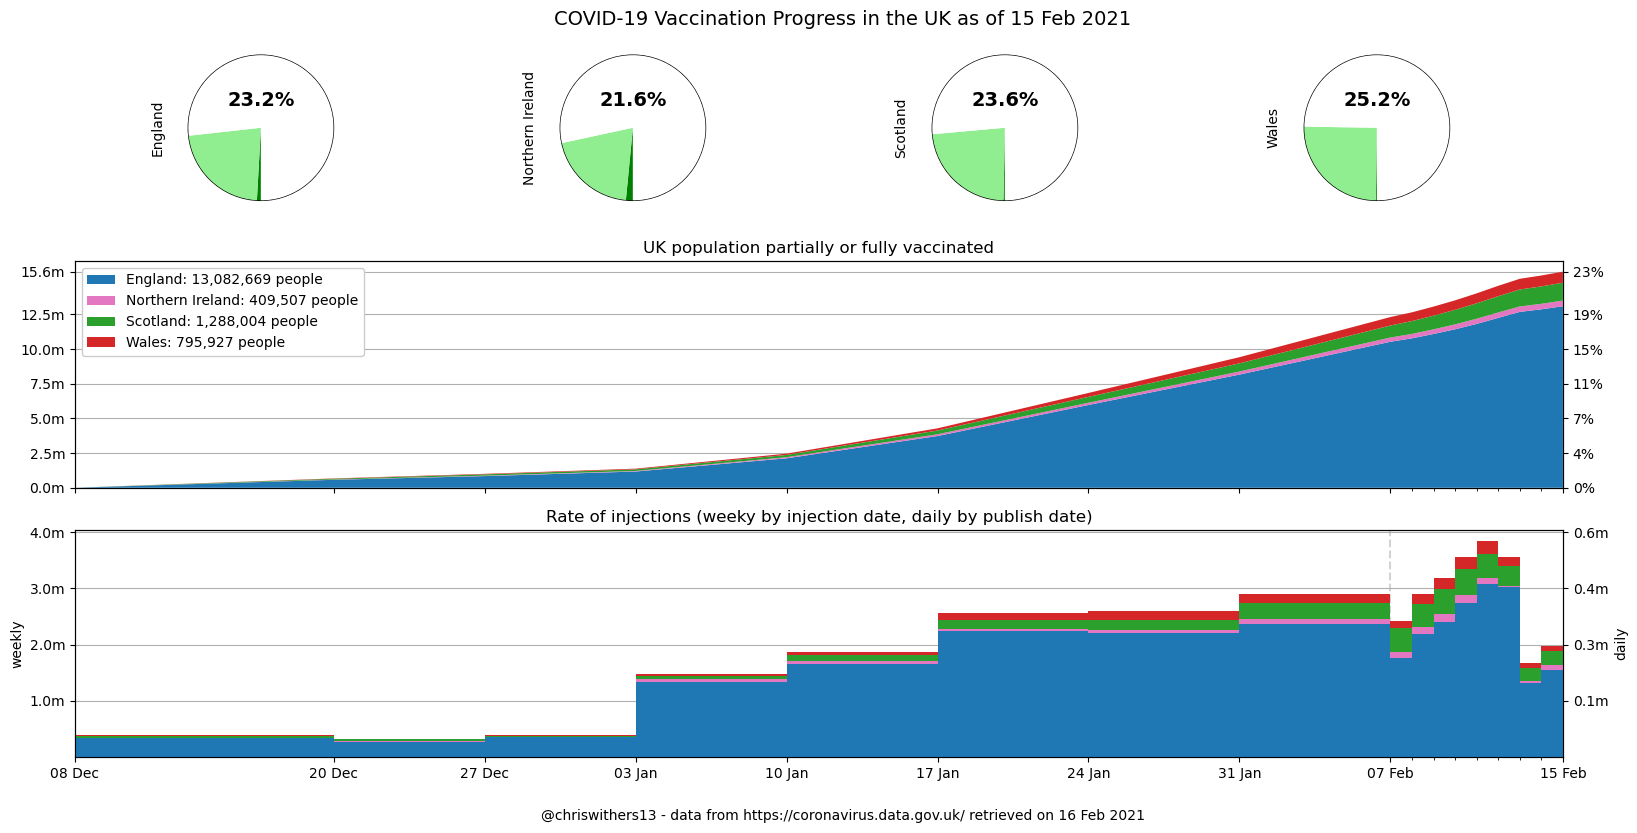

In [5]:
results = vaccination_dashboard()
display(results, f"partial: {results['any'].sum():,.0f}", f"full: {results['full'].sum():,.0f}")

In [6]:
vaccination_changes()

,,First Dose (New),Second Dose (Total),Complete (New),First Dose (Total),cumPeopleVaccinatedSecondDoseByPublishDate,Complete (Total)
,,,,,,,
England,15 Feb 21,"+219,760","+1,854","+1,854","+13,082,669","+492,576","+492,576"
Northern Ireland,15 Feb 21,"+12,264",+196,+196,"+409,507","+29,201","+29,201"
Scotland,15 Feb 21,"+32,814","+2,636","+2,636","+1,288,004","+17,137","+17,137"
Wales,15 Feb 21,"+11,118","+1,849","+1,849","+795,927","+7,251","+7,251"


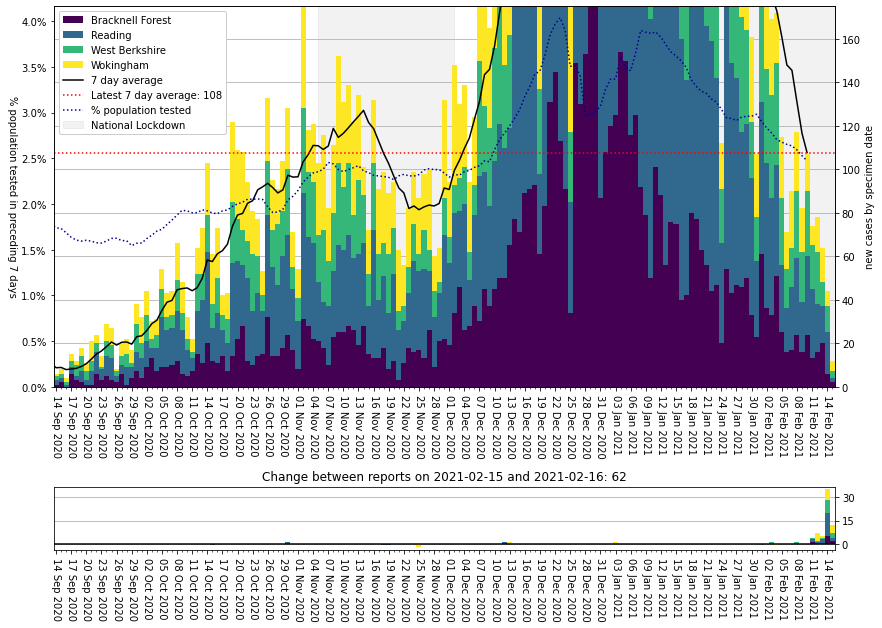

In [7]:
plot_areas(for_date, areas=my_areas, earliest='2020-09-14', ylim=175)

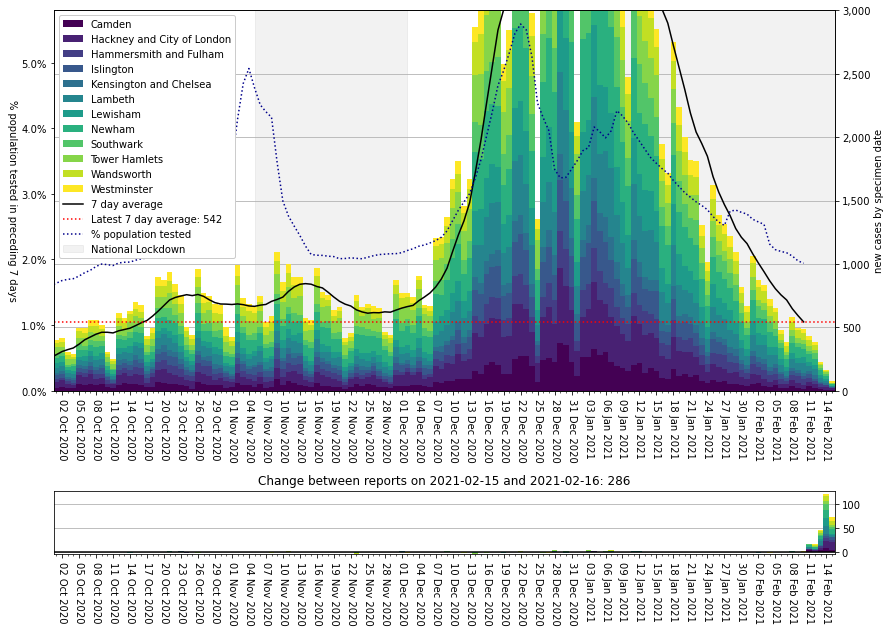

In [8]:
plot_areas(for_date, areas=london_areas, ylim=3_000)

In [9]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [10]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E07000150,Corby,276.939267,200.0,2021-02-15
S12000008,East Ayrshire,273.748053,334.0,2021-02-15
E06000002,Middlesbrough,248.262165,350.0,2021-02-15
E08000013,St. Helens,237.561259,429.0,2021-02-15
E07000170,Ashfield,225.925984,289.0,2021-02-15
E06000016,Leicester,216.247346,766.0,2021-02-15
E08000028,Sandwell,215.862384,709.0,2021-02-15
E08000011,Knowsley,210.125810,317.0,2021-02-15
E06000031,Peterborough,207.654542,420.0,2021-02-15


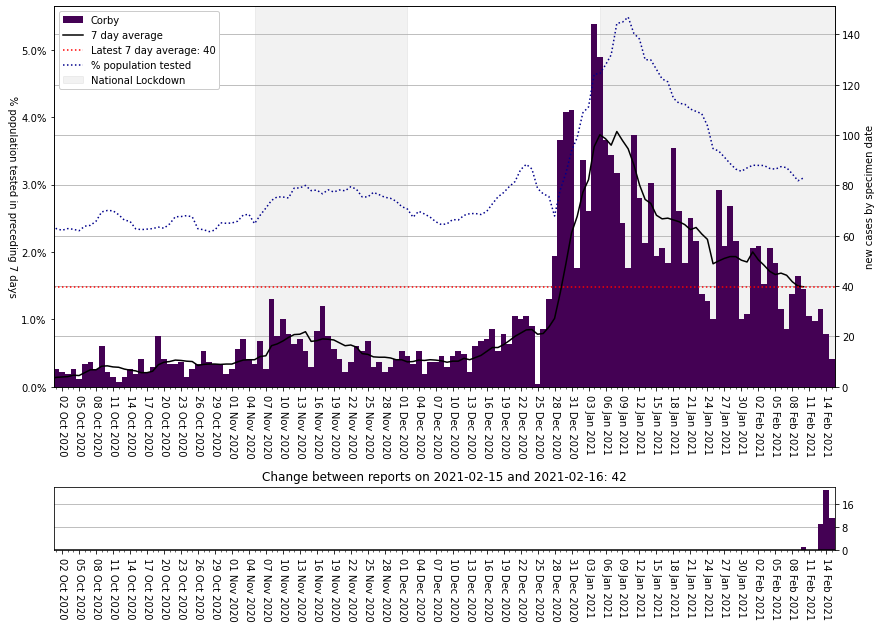

In [11]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [12]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000025,Birmingham,160.533746,1833.0,2021-02-15
E08000035,Leeds,132.259289,1049.0,2021-02-15
E08000032,Bradford,162.474804,877.0,2021-02-15
E08000003,Manchester,154.289166,853.0,2021-02-15
E08000012,Liverpool,158.018802,787.0,2021-02-15
E06000016,Leicester,216.247346,766.0,2021-02-15
S12000049,Glasgow City,114.038413,722.0,2021-02-15
E06000047,County Durham,134.504446,713.0,2021-02-15
E08000028,Sandwell,215.862384,709.0,2021-02-15


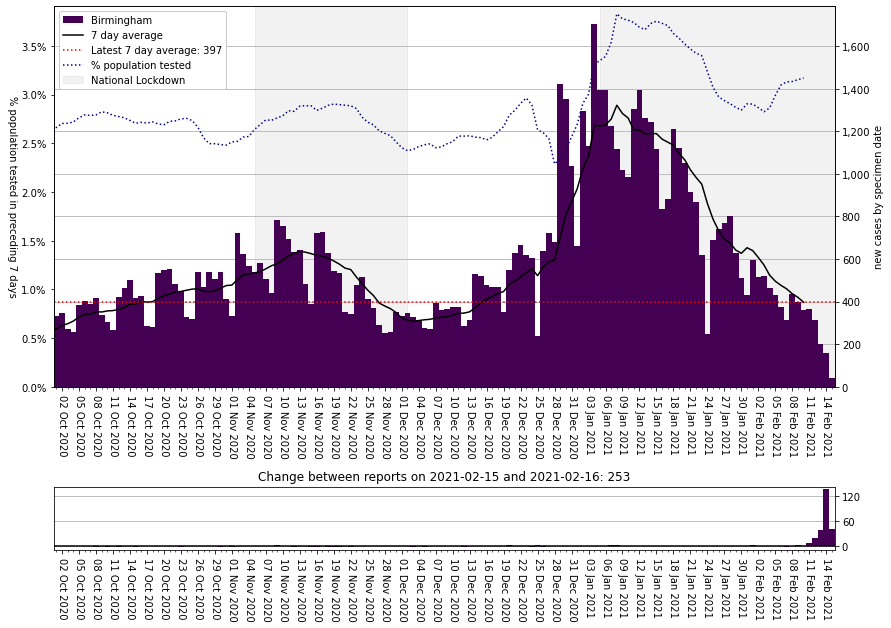

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [14]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)

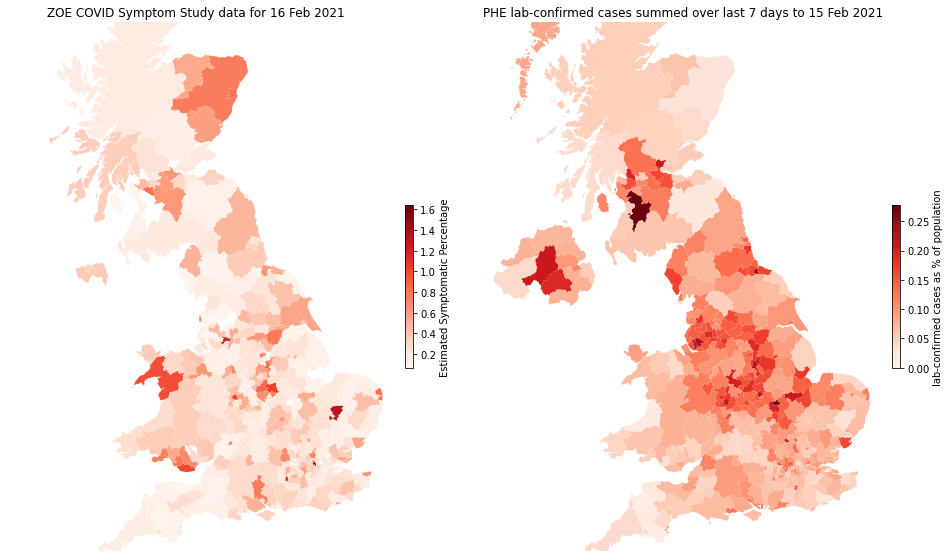

In [15]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, phe_recent_geo, phe_recent_title)   

In [16]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, phe_recent_geo, phe_recent_title)

Loading BokehJS ...

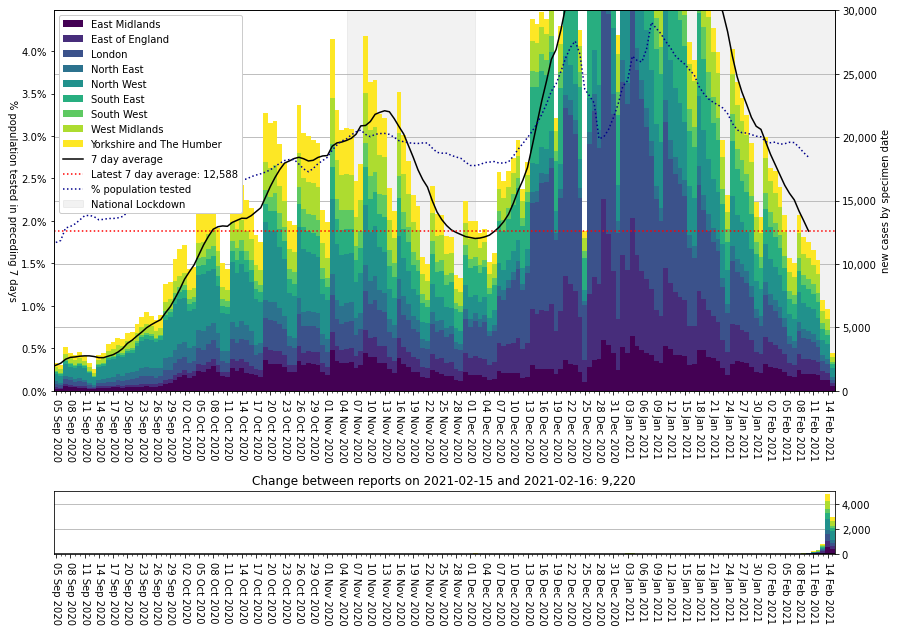

In [17]:
plot_areas(for_date, area_type=region, ylim=30_000, earliest='2020-09-05')

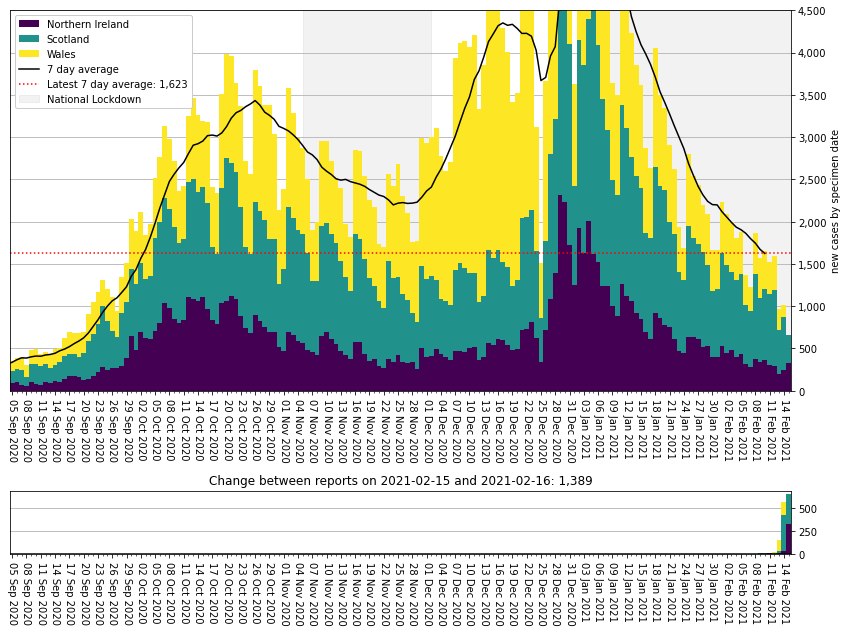

In [18]:
plot_areas(for_date, 'cases_devolved', ylim=4_500, diff_ylims=None, earliest='2020-09-05')